<a href="https://colab.research.google.com/github/AsiMrz/AB-Testing/blob/ab-testing/AB_testing_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AB Testing on Mobile Game COOKIE CAT

In [1]:
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats
from IPython.display import display, Latex

Goal of AB testing: Data analysis on the impact on player retention  with an AB-test. 
Variations diffrent Gates in level 30 and level 40.
Sample: 90,189 players
Condition: randomassignmet to to either gate_30 or gate_40.


# Data Introduction

In [4]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/AsiMrz/AB-Testeing/data/cookie_cats.csv' 
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()
# Downloading the csv file from your GitHub account

# Reading the downloaded content and turning it into a pandas dataframe

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Variables:
**userid** a unique number that identifies each player.
**version** whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
**sum_gamerounds** the number of game rounds played by the player during the first week after installation
**retention_1** did the player come back and play 1 day after installing?
**retention_7** did the player come back and play 7 days after installing?

# Bootstraping

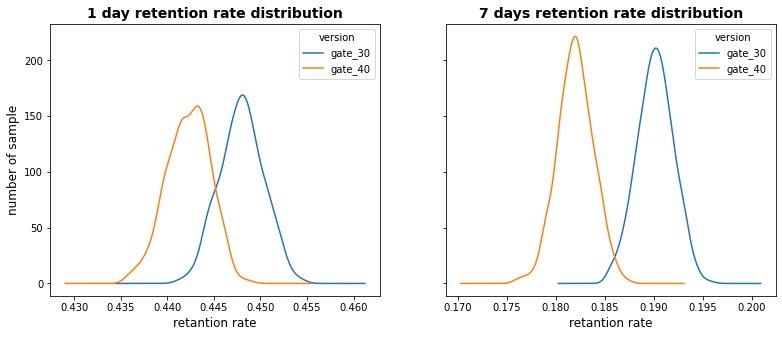

In [9]:
# Creating an list with bootstrapped means for each A/B group
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)
boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()